# TD oscillo -- modélisation par une série de Fourier

### ***Chargement des données***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
oscillo = np.load("oscillo.npz")
print(oscillo.files)

['t', 'signal']


In [3]:
t = oscillo[oscillo.files[0]]
s = oscillo[oscillo.files[1]]

In [4]:
print("La dimension de la donnée t est ",t.shape)
print("La dimension de la donnée s est ",s.shape)

La dimension de la donnée t est  (401,)
La dimension de la donnée s est  (401,)


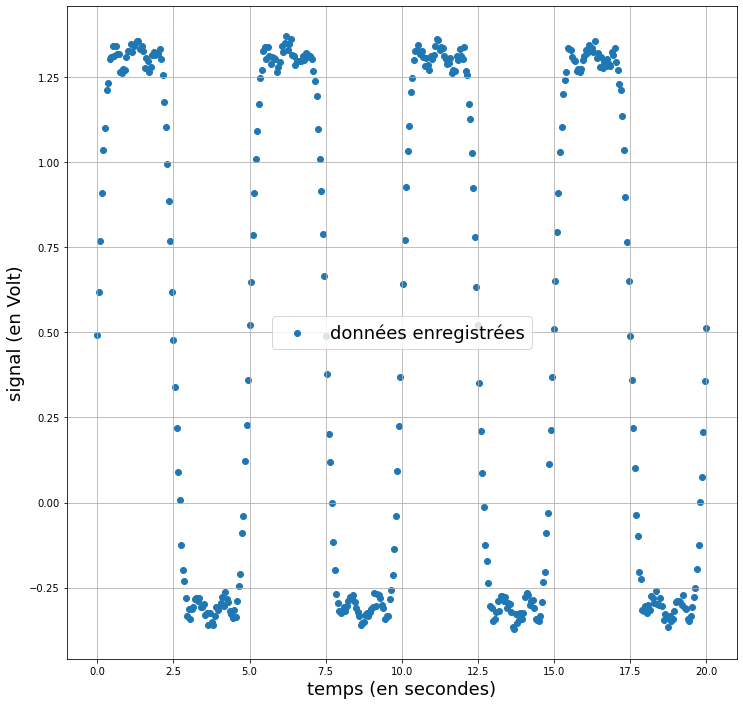

In [5]:
plt.figure(figsize=(12,12))
plt.scatter(t, s, label="données enregistrées")
plt.xlabel('temps (en secondes)', fontsize=18)
plt.ylabel('signal (en Volt)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()


***


###  ***Modélisation envisagée***  
La visualisation graphique montre :  
* un signal présente une période égale à ***5 sec***, donc il est de fréquence $F_0=0.2$ Hz
* un signal impair qui peut donc être représenté par une ***somme de fonctions sinus non déphasés***
* des oscillations rapide, donc de nombreux termes dans la série de Fourier 

Le modèle recherché est :
$$\hat{s} = a_0+\sum_{k=1}^N a_k\,\sin(2\,\pi\,(k\,F_0)\,t)$$

N'ayant pas d'idée sur la valeur appropriée de $N$, on peut commencer avec $N=10$ et baisser dans un second temps cette valeur si les termes les plus élevés n'étaient pas significatifs

In [6]:
n, F0 = len(s), 0.2
M, V = np.stack((np.ones(n) if k == 0 else np.sin(2*np.pi*k*F0*t) for k in range(0, 10)), axis=1), s
Coefs, Residu, _ ,_  = list(np.linalg.lstsq(M, V,rcond=None))
hats = M @ Coefs

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
print(f"les coefficients: {Coefs}")

les coefficients: [ 4.99554994e-01  1.00134522e+00  2.00813058e-03  2.51454072e-01
  1.20882007e-03  9.98277621e-02 -4.12778643e-04  9.25530204e-04
 -1.66606644e-03  5.70229593e-04]


#### visualisation graphique

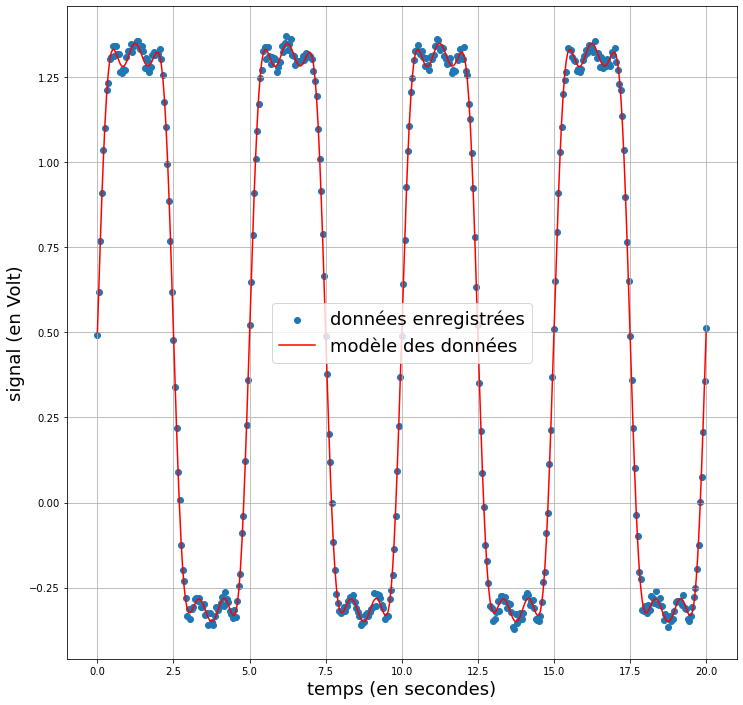

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(t, s, label="données enregistrées")
plt.plot(t, hats, c='r', label="modèle des données")
plt.xlabel('temps (en secondes)', fontsize=18)
plt.ylabel('signal (en Volt)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()


***


#### Modélisation en ne gardant que les éléments significatifs de la série de Fourier

La valeur numérique des coefficients obtenu sur la première modélisation laisse penser que les seuls membres significatifs sont $a_0$, $a_1$, $a_3$ et $a_5$  
***-> on relance une modélisation avec ces seuls 4 membres***

In [9]:
M, V = np.stack((np.ones(n) if k == 0 else np.sin(2*np.pi*k*F0*t) for k in [0, 1, 3, 5]), axis=1), s
Coefs, Residu, _ ,_  = list(np.linalg.lstsq(M, V,rcond=None))
hats1 = M @ Coefs

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


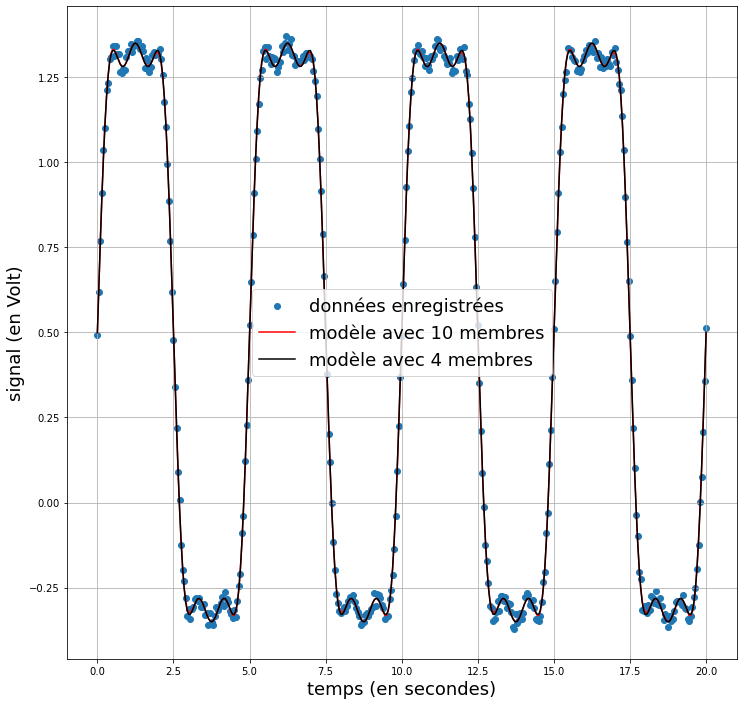

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(t, s, label="données enregistrées")
plt.plot(t, hats, c='r', label="modèle avec 10 membres")
plt.plot(t, hats1, c='k', label="modèle avec 4 membres")
plt.xlabel('temps (en secondes)', fontsize=18)
plt.ylabel('signal (en Volt)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()